### **Spam Detection using Machine Learning:**

Ever get those annoying text messages that are clearly ads or scams ("spam") mixed in with messages from friends ("ham")? Our goal in this project is to build a simple computer program that can automatically tell the difference! This is a cool application of Machine Learning, where we train a computer to learn from examples.

We'll use a famous dataset of SMS messages that are already labeled as either spam or ham, so our computer knows what to look for.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### **Getting Our Data Ready: Loading & Basic Cleaning**
First things first, we need to load our messages into Python. We'll use pandas to help us handle the data.

In [39]:
# Load data
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
# Display first few rows
df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### **Exploratory Data Analysis (EDA)**
Let's explore the dataset to understand the distribution of spam and ham messages.

In [40]:
# Check for missing values
df.isnull().sum()

,0
label,0
text,0


In [41]:
# Message length feature
df['length'] = df['text'].apply(len)
df[['label', 'length']].groupby('label').describe()


length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
0      4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
1       747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

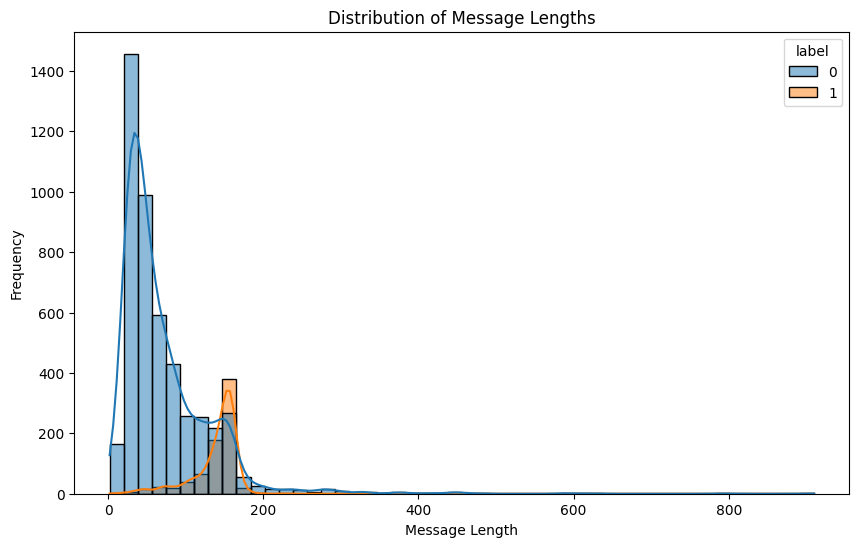

In [42]:
# Plot message length distribution by label
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='length', hue='label', bins=50, kde=True)
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()


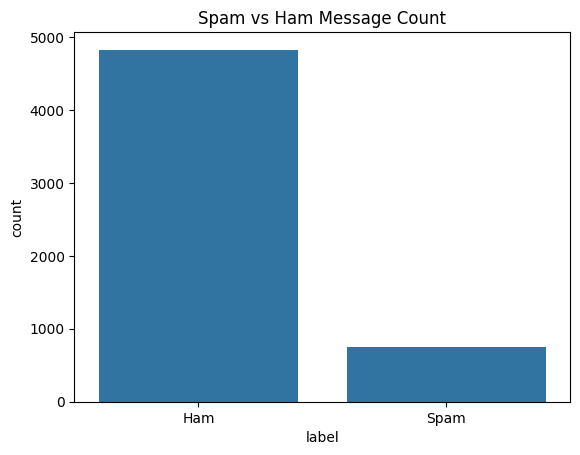

In [43]:
# Count of ham vs spam messages
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Message Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()


In [44]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [45]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [46]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM (Linear)': LinearSVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



=== Logistic Regression ===
Accuracy: 0.9524663677130045
Confusion Matrix:
 [[962   3]
 [ 50 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115


=== Naive Bayes ===
Accuracy: 0.9668161434977578
Confusion Matrix:
 [[965   0]
 [ 37 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


=== SVM (Linear) ===
Accuracy: 0.97847533632287
Confusion Matrix:
 [[960   5]
 [ 19 131]]
Classification 

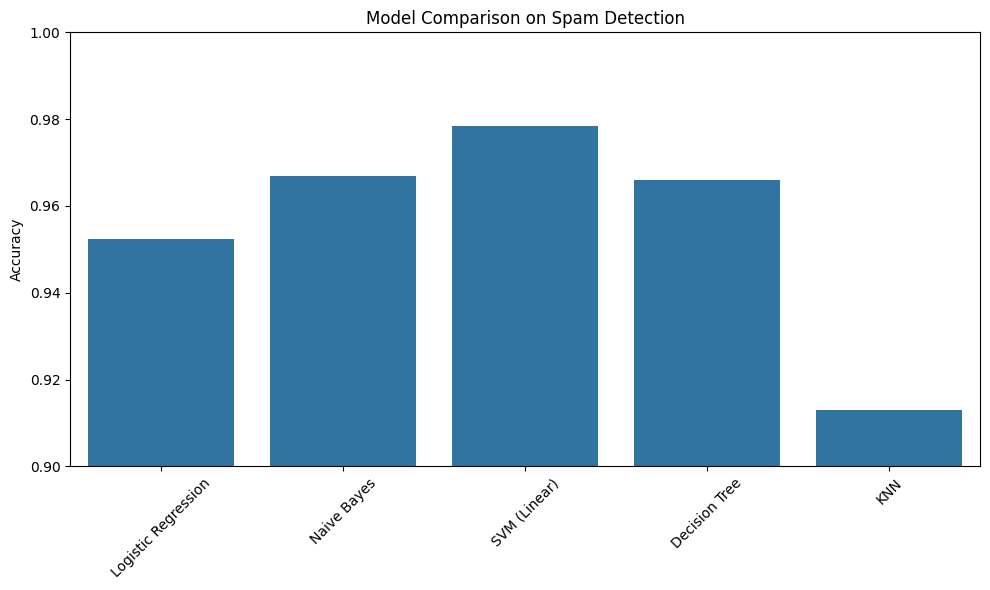

In [47]:
# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.title("Model Comparison on Spam Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
def predict_message(messages):
    """
    Predicts whether the given messages are Spam or Ham using the trained SVM model.

    Parameters:
        messages (list of str): List of text messages to classify.

    Returns:
        list of tuples: Each tuple contains (message, prediction)
    """
    messages_vec = vectorizer.transform(messages)
    predictions = models['SVM (Linear)'].predict(messages_vec)
    return [(msg, "Spam" if pred == 1 else "Ham") for msg, pred in zip(messages, predictions)]

# 👇 Example: Use input() in a loop to let users enter messages
print("Enter messages one by one (type 'exit' to stop):")
user_inputs = []

while True:
    msg = input("Enter message: ")
    if msg.lower() == 'exit':
        break
    user_inputs.append(msg)

if user_inputs:
    results = predict_message(user_inputs)
    print("\n📢 Prediction Results:")
    for message, label in results:
        print(f"> {label} - {message}")


Enter messages one by one (type 'exit' to stop):
Enter message: Win a free trip to Paris!
Enter message: Hey, are we still on for tomorrow?
Enter message: exit

📢 Prediction Results:
> Spam - Win a free trip to Paris!
> Ham - Hey, are we still on for tomorrow?


### **Conclusion**
In this project, we developed a machine learning-based spam detection system using a real-world SMS dataset. The project followed a complete data science pipeline including data cleaning, text preprocessing with TF-IDF vectorization, model training, and performance evaluation.

We tested and compared five different classification algorithms:
*   Logistic Regression
*   Naive Bayes
*   Support Vector Machine (SVM)
*   Decision Tree
*   K-Nearest Neighbors (KNN)

Among all the models, the **Linear Support Vector Machine (SVM)** delivered the best performance with an accuracy of **97.85%**, showing excellent precision and recall for both spam and ham messages.

This model is suitable for real-time spam detection tasks due to its:

* High accuracy

* Speed during prediction

* Robustness in handling text data

### **Key Takeaways**

Linear models such as SVM and Naive Bayes are highly effective for spam detection.

A simple ML pipeline can be easily deployed to classify messages in real-time.